In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing = pd.read_csv('housing.csv',names=names)

In [3]:
print(housing.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
housing['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

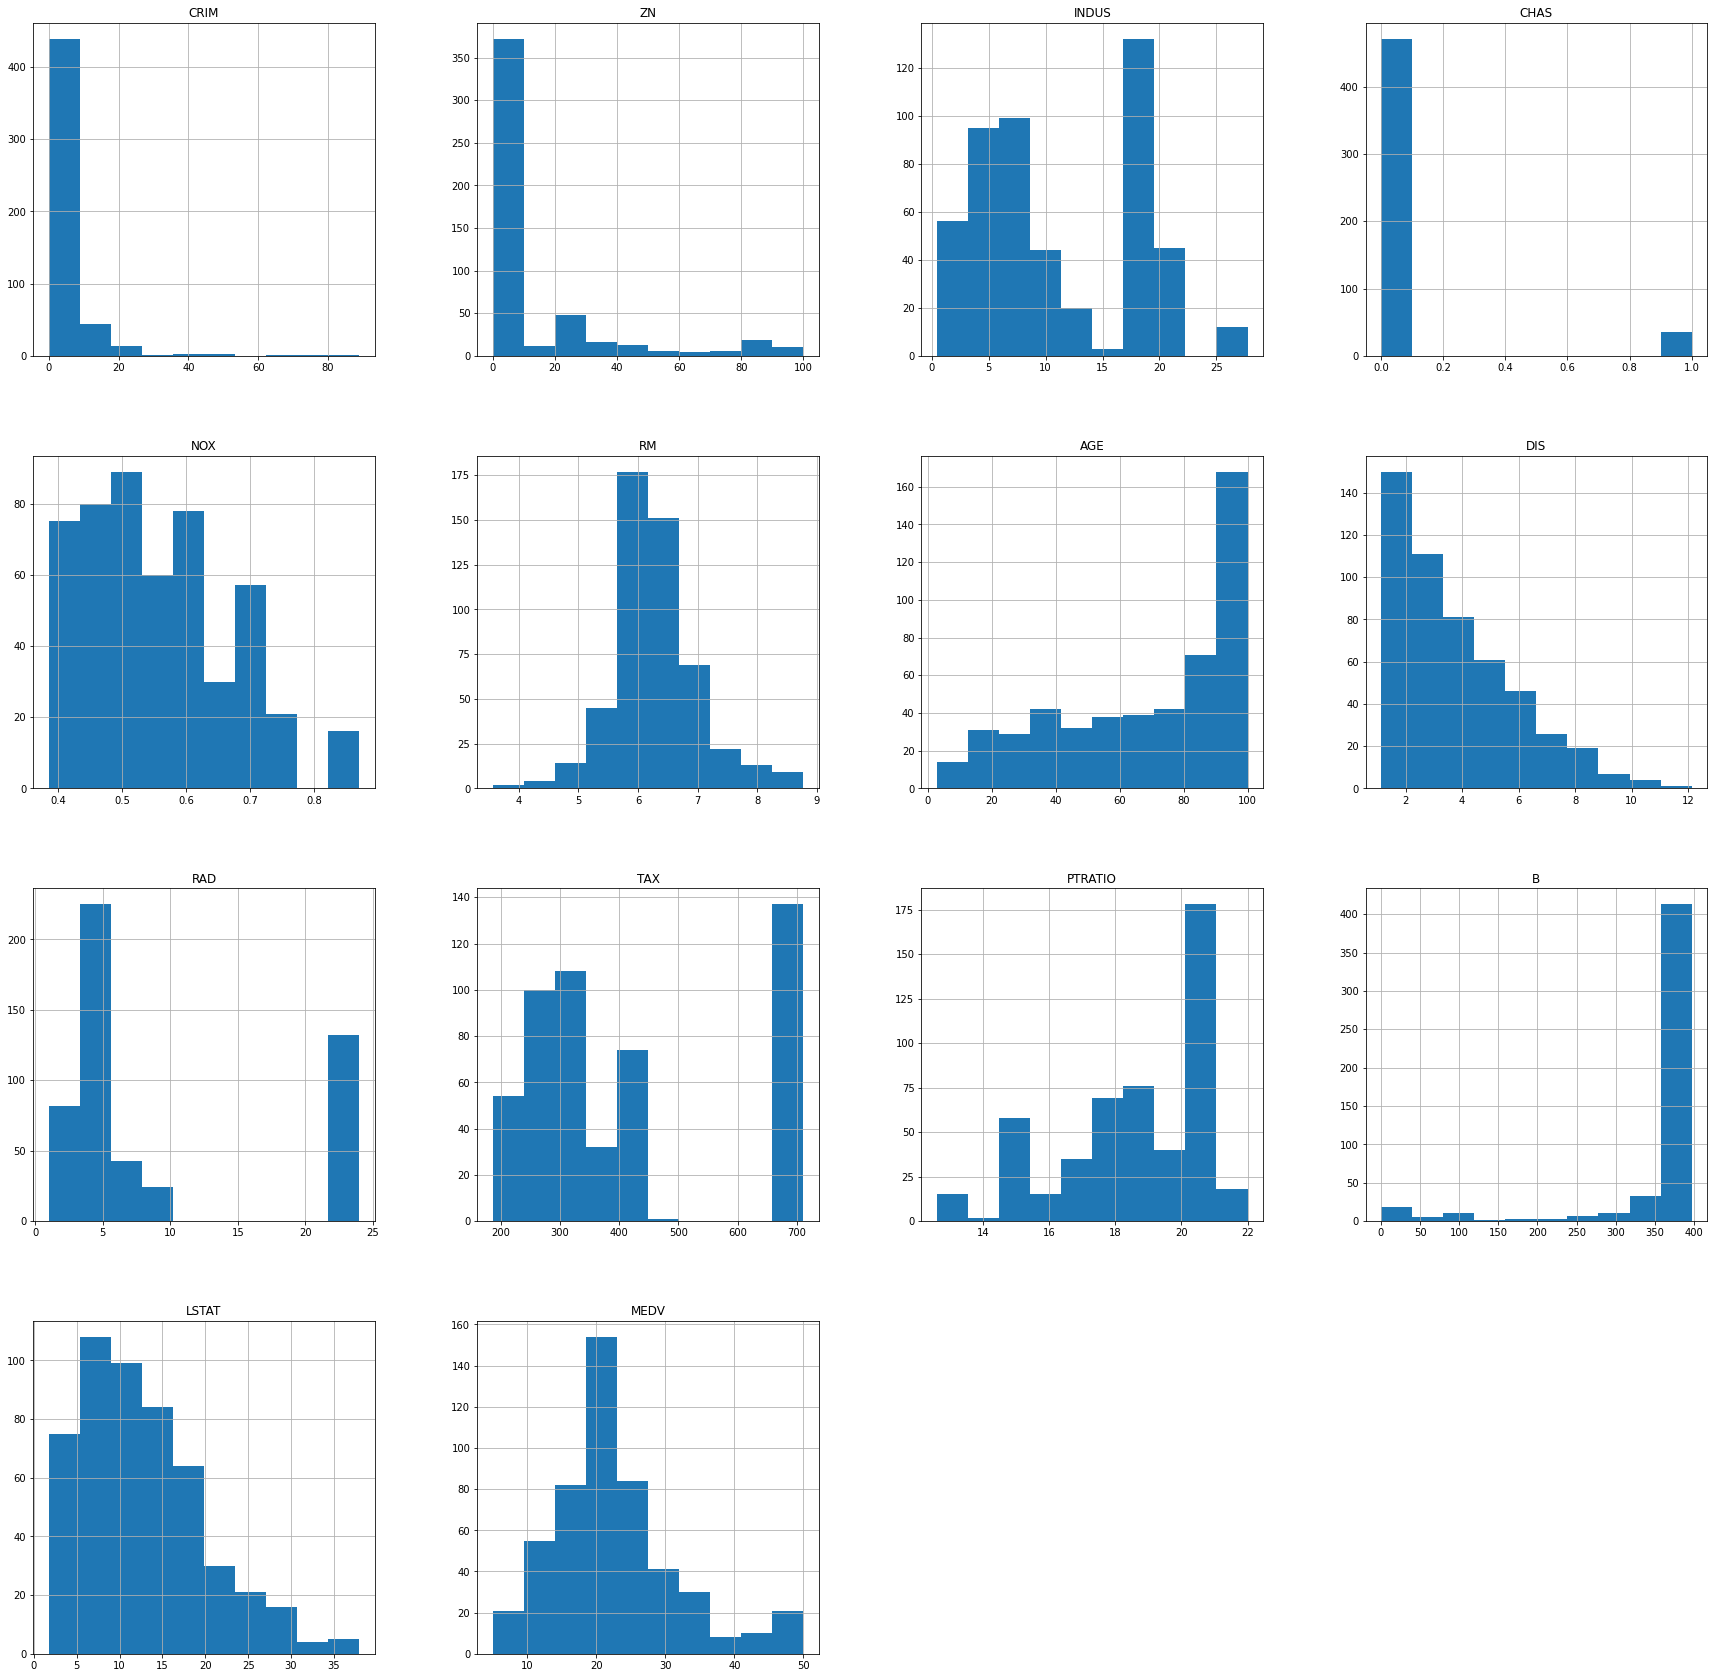

In [6]:
housing.hist(figsize=(30,30))

In [7]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(train_set)

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     PTRATIO       B  LSTAT  MEDV  
477     20.2  349.48  24.91  12.0  
15      21.0  395.62   8.47

In [8]:
train_set_label = train_set['MEDV']
train_set = train_set.drop('MEDV',axis=1)

In [9]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
housing_train = strat_train_set.drop('MEDV',axis=1)
housing_train_labels = strat_train_set['MEDV']
housing_test = strat_test_set.drop('MEDV',axis=1)
housing_test_labels = strat_test_set['MEDV']

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel=

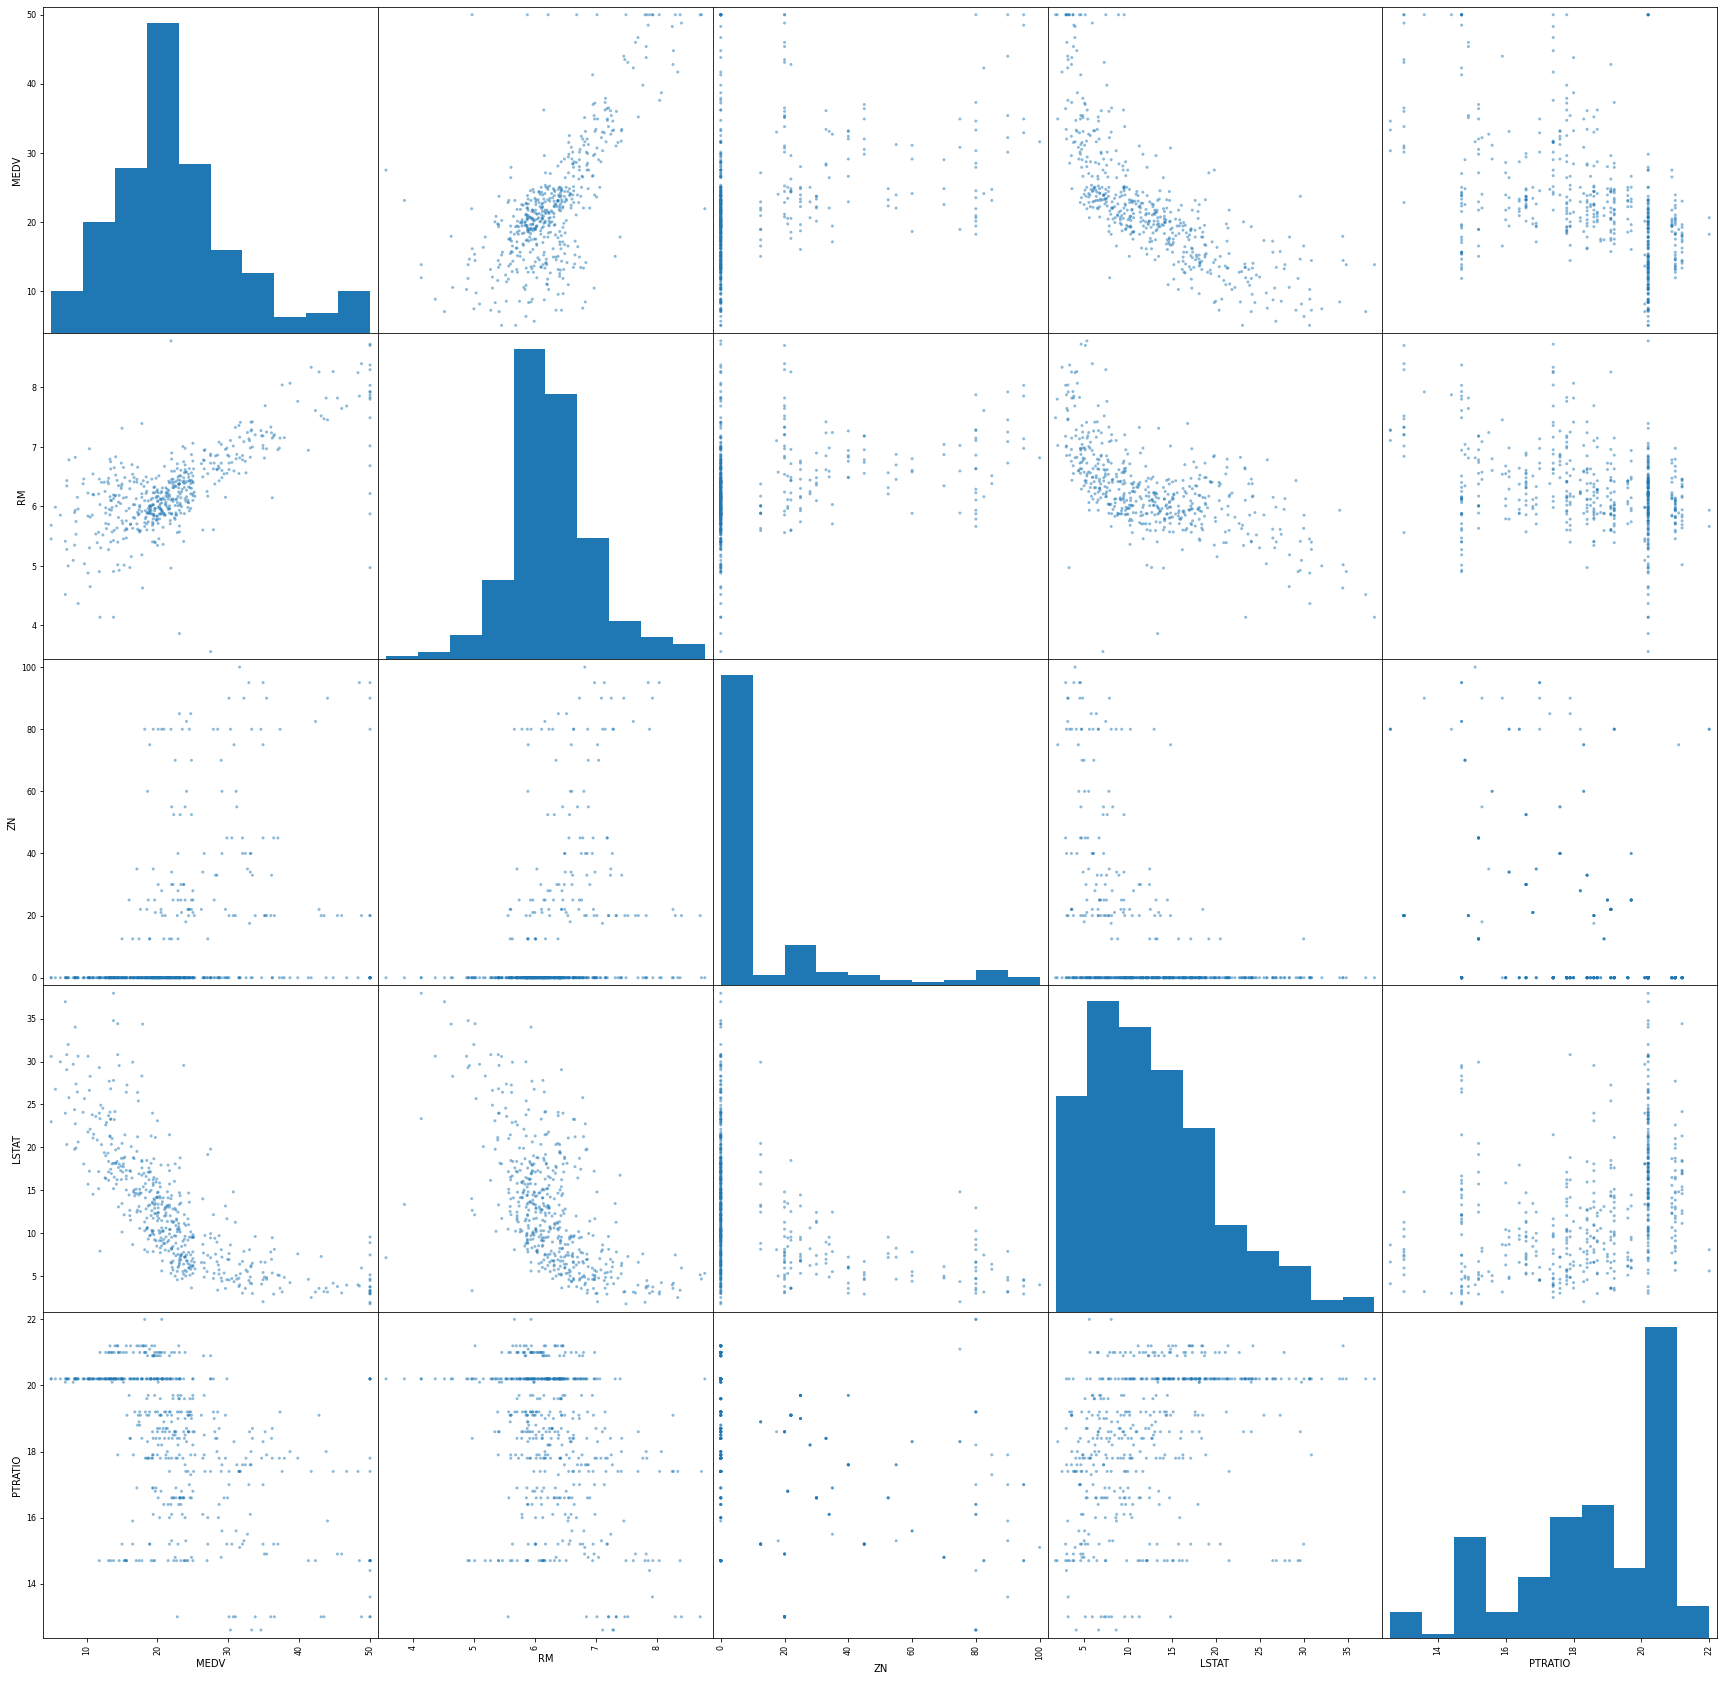

In [11]:
attributes = ['MEDV','RM','ZN','LSTAT','PTRATIO']
scatter_matrix(housing[attributes],figsize=(30,30))

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

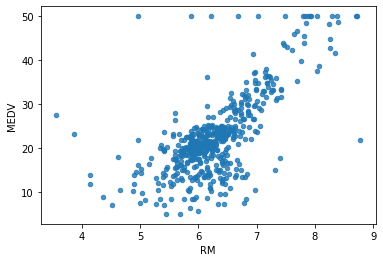

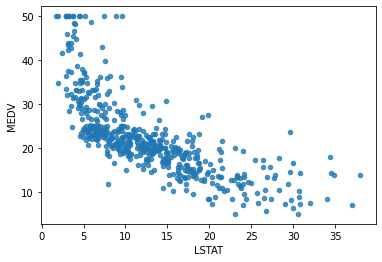

In [12]:
housing.plot(kind='scatter',y='MEDV',x='RM',alpha=0.8)
housing.plot(kind='scatter',y='MEDV',x='LSTAT',alpha=0.8)

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

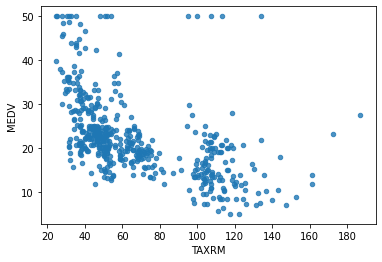

In [13]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.plot(kind='scatter',x='TAXRM',y="MEDV",alpha=0.8)

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [15]:
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [16]:
def result(scores):
    print("Scores :",scores)
    print("Mean :",scores.mean())

In [17]:
my_pipeline.fit_transform(housing_train)
my_pipeline.fit_transform(housing_test)

array([[-0.35082247, -0.49148409, -1.25183452, ..., -1.08091535,
         0.2995192 , -0.51357301],
       [ 1.37303938, -0.49148409,  1.15752471, ...,  0.78926008,
         0.35531976,  1.43854081],
       [-0.2938439 , -0.49148409, -0.61122142, ..., -0.42852857,
         0.40196786, -0.66968264],
       ...,
       [-0.34805722,  0.27583291, -0.69445654, ..., -0.68948328,
         0.40196786, -1.0146106 ],
       [-0.34631323, -0.49148409,  2.27971238, ...,  0.31084311,
         0.11809354,  0.32198523],
       [-0.3425412 , -0.49148409,  0.53177502, ..., -0.86345309,
         0.40196786,  0.86465206]])

In [18]:
# model = RandomForestRegressor()
# lr = DecisionTreeRegressor()
# lr.fit(housing_train,housing_train_labels)
model = LinearRegression()

In [19]:
# pred_lr = lr.predict(housing_test)
# print(list(lr.predict(housing_test)))
# print(list(housing_test_labels))

In [20]:
# variance = mean_squared_error(housing_test_labels,pred_lr)
# std = np.sqrt(variance)
# print(std)

In [21]:
kfold = KFold(n_splits=10,random_state=42,shuffle=True)
score = cross_val_score(model,housing_train,housing_train_labels,cv=kfold,scoring='neg_mean_squared_error')
scores = np.sqrt(-score)
result(scores)

Scores : [6.30300809 5.30051071 4.90383737 5.37855163 6.94815592 3.94946914
 5.12658113 3.97082913 5.11315849 3.76487029]
Mean : 5.075897189097605


In [25]:
from joblib import load,dump

In [26]:
dump(model,'hargun.joblib')

['hargun.joblib']

In [27]:
model.fit(housing_train,housing_train_labels)
pred_model = model.predict(housing_test)
var = mean_squared_error(pred_model,housing_test_labels)
np.sqrt(var)

4.143819554319316

In [28]:
model.score(housing_test,housing_test_labels)

0.7572684891063775